Img shape: (720, 1280, 3)


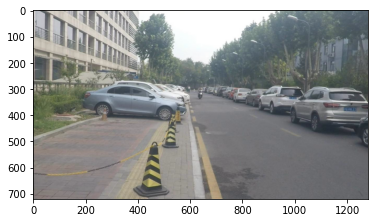

In [3]:
# Open video as array of numpy frames

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture('1.avi')
video = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    video.append(frame)
video = np.array(video)
img = cv2.cvtColor(video[0],cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(f'Img shape: {np.shape(img)}')

# Open Laptop camera
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [33]:
import numpy as np
temp = np.array([461, 452, 709, 1117, 659, 853, 933, 1305, 297, 105, 97, 63, 597, 563,
  677, 813, 77, 2260, 516, 888, 656, 1407, 167, 364, 177, 377, 567, 802,
  227, 515, 746, 686, 594, 562, 1131, 898, 841, 773, 926, 892, 832, 963,
  894, 955, 723, 594, 477, 466, 644, 764, 898, 966, 1106, 971, 857, 803,
  723, 659, 755, 647, 894])
vix, idx = 0, 5311
while (idx-temp[vix]+1>0):
    idx -= temp[vix]
    vix += 1
print(vix, idx, idx+1,idx+2,idx+3,idx+4)

7 127 128 129 130 131


In [3]:
# Video to frame

import os

import cv2


def walk(folder):
    for dirpath, dirs, files in os.walk(folder):
        for filename in files:
            yield dirpath, filename

def is_video(ext):
    if ext in ['.mp4', '.avi']: return True
    else: return False

def video_to_frames(filepath):
    cap = cv2.VideoCapture(f'{filepath}.avi')
    n = 0
    while True:
        ret, frame = cap.read()
        if not ret: break
        cv2.imwrite(f'{filepath}/{str(n).zfill(4)}.jpg', frame)
        n += 1
    print(f'Saved {str(n).zfill(4)} frames at {filepath}')


if __name__ == '__main__':
    path = "C:/Users/eunwoo/Desktop/temp/unstable"
    for folder, filename in walk(path):
        name, ext = os.path.splitext(filename)
        if not is_video(ext): continue
        dir = f'{folder}/{name}' # os.path.join(folder,name)
        try: os.mkdir(dir)
        except: pass
        video_to_frames(dir)

Saved 0465 frames at C:/Users/eunwoo/Desktop/temp/unstable/1


In [2]:
# Frame to h5

import os

import cv2
import h5py
import numpy as np
from PIL import Image

'''
Create h5 file containing resized images.
All images are stored as numpy array.
'''

def get_img(path, args, aug):
    img = Image.open(path)
    img = img.resize(args.img_size, Image.BICUBIC)
    img = np.array(img)
    if aug == 'Hflip':
        img = cv2.flip(img, 0)
    elif aug == 'Vflip':
        img = cv2.flip(img, 1)
    elif aug == 'HVflip':
        img = cv2.flip(img, -1)
    return img

def frame_to_numpy_array(path, aug):
    arr = [get_img(os.path.join(path,name),aug) for name in os.listdir(path)]
    return np.array(arr)
    

def create_h5(dir, aug, args):
    stable_path = f"{args['root']}/stable/{dir}"
    unstable_path = f"{args['root']}/unstable/{dir}"

    stable = frame_to_numpy_array(stable_path, aug)
    unstable = frame_to_numpy_array(unstable_path, aug)

    stable, unstable = np.array(stable), np.array(unstable)
    h5 = h5py.File(f"{args['h5_path']}/{dir.zfill(2)}_{aug}.h5", 'w')
    h5.create_dataset('stable', data=stable)
    h5.create_dataset('unstable', data=unstable)
    h5.create_dataset('frame', data=np.array(len(stable)))
    h5.close()

def generate(args):
    for path in sorted(os.listdir(f"{args['root']}/stable")):
        if os.path.isdir(path):
            for aug in args['augmentation']:
                create_h5(path, aug, args)

def get_args():
    args = {'root':'E:/imeunu/vr_dataset/220222',
            'h5_path' : 'E:/imeunu/vr_dataset/220222/h5',
            'augmentation' : [None, 'Hflip', 'Vflip', 'HVflip'],
            'img_size' : (320,180)}

    return args

# def generate(args):
#     for path in sorted(os.listdir(f"{args['root']}/stable")):
#         [create_h5(path, aug, args) for aug in args['augmentation'] if os.path.isdir(path)]

# def get_args():
#     args = {'root':'C:\\Users\\eunwoo\\Desktop\\VILab\\Video Stabilization\\temp',
#             'h5_path' : 'C:\\Users\\eunwoo\\Desktop\\VILab\\Video Stabilization\\temp\\h5',
#             'augmentation' : [None, 'Hflip', 'Vflip', 'HVflip'],

# https://www.youtube.com/watch?v=3En7ZVK6rp8

if __name__ == '__main__':
    args = get_args()
    try: os.mkdir(args['h5_path'])
    except: pass
    generate(args)

In [17]:
import numpy as np
temp = np.array(
  [461, 452, 709, 1117, 659, 853, 933, 1305, 297, 105, 97, 63, 597, 563,
  677, 813, 77, 2260, 516, 888, 656, 1407, 167, 364, 177, 377, 567, 802,
  227, 515, 746, 686, 594, 562, 1131, 898, 841, 773, 926, 892, 832, 963,
  894, 955, 723, 594, 477, 466, 644, 764, 898, 966, 1106, 971, 857, 803,
  723, 659, 755, 647, 894])

print(sum(temp) / len(temp))

710.5081967213115


In [11]:
# Generate Video with inferenced frames

import cv2
def generate_video(n):
    root = f'C:/Users/eunwoo/Downloads/{n}'
    os.chdir(root)
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(filename='output.avi', fourcc=fourcc, fps=30, frameSize=(320, 180))
    for path in os.listdir(root):
        img = cv2.imread(f'{root}/{path}')
        out.write(img)
        print(f'Rendered {path}')
    out.release()


generate_video('savehere')

Rendered 0000.jpg
Rendered 0001.jpg
Rendered 0002.jpg
Rendered 0003.jpg
Rendered 0004.jpg
Rendered 0005.jpg
Rendered 0006.jpg
Rendered 0007.jpg
Rendered 0008.jpg
Rendered 0009.jpg
Rendered 0010.jpg
Rendered 0011.jpg
Rendered 0012.jpg
Rendered 0013.jpg
Rendered 0014.jpg
Rendered 0015.jpg
Rendered 0016.jpg
Rendered 0017.jpg
Rendered 0018.jpg
Rendered 0019.jpg
Rendered 0020.jpg
Rendered 0021.jpg
Rendered 0022.jpg
Rendered 0023.jpg
Rendered 0024.jpg
Rendered 0025.jpg
Rendered 0026.jpg
Rendered 0027.jpg
Rendered 0028.jpg
Rendered 0029.jpg
Rendered 0030.jpg
Rendered 0031.jpg
Rendered 0032.jpg
Rendered 0033.jpg
Rendered 0034.jpg
Rendered 0035.jpg
Rendered 0036.jpg
Rendered 0037.jpg
Rendered 0038.jpg
Rendered 0039.jpg
Rendered 0040.jpg
Rendered 0041.jpg
Rendered 0042.jpg
Rendered 0043.jpg
Rendered 0044.jpg
Rendered 0045.jpg
Rendered 0046.jpg
Rendered 0047.jpg
Rendered 0048.jpg
Rendered 0049.jpg
Rendered 0050.jpg
Rendered 0051.jpg
Rendered 0052.jpg
Rendered 0053.jpg
Rendered 0054.jpg
Rendered 0

In [1]:
import os
import csv
csvfile, newfile, buffer = 'history8', 'train8.csv', []
os.chdir('C:/Users/eunwoo/Desktop/vidstab')

def arange_csv(csvfile, newfile):
    buffer = []
    with open(csvfile, 'r') as f2:
            rdr = csv.reader(f2)
            for line in rdr:
                x, y = line
                if len(x) < len(y):
                    temp = y
                    y = x
                    x = temp
                buffer.append((x,y))

    with open(newfile, 'w', newline='') as f1:
        writer = csv.writer(f1)
        for i in range(len(buffer)):
            writer.writerow(buffer[i])

seq = 1
# arange_csv(f'history{seq}',f'train{seq}.csv')
arange_csv(f'measure{seq}',f'test{seq}.csv')

In [1]:
import cv2
import numpy as np


def get_toy():
    '''Assign frame pairs to variables'''
    stable, unstable, root = [], [], 'C:/Users/eunwoo/Desktop/temp'
    # adjust the root variable with your environment
    for i in ['stable', 'unstable']:
        for j in os.listdir(f'{root}/{i}'):
            img = cv2.imread(f'{root}/{i}/{j}')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if i == 'stable':
                stable.append(img)
            else:
                unstable.append(img)
    return stable, unstable

def find_H(f1, f2):
    '''Find homography transformation from two images'''
    # Find feature descriptor with SIFT.
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(f1, None)
    kp2, des2 = sift.detectAndCompute(f2, None)

    # Match the features.
    bf = cv2.BFMatcher()
    matches = bf.match(des1, des2)
    sorted_matches = sorted(matches, key = lambda x: x.distance)
    res = cv2.drawMatches(f1, kp1, f2, kp2, sorted_matches[:30], None, flags = 2)

    # Remove outliers and find Homography. You can adjust hyperparameters.
    src = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape((-1, 1, 2))
    dst = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape((-1, 1, 2))
    H, status = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

    return H

def find_t(f1, f2):
    '''Extract affine translation parameters from H'''
    H = find_H(f1, f2)
    return (H[0][2], H[1][2])

def find_camera_distance(stable, unstable):
    '''Find x,y distance between camera center'''
    t = [find_t(stable[i], unstable[i]) for i in range(len(stable))]
    return np.mean(t, axis=0)

if __name__ == '__main__':
    stable, unstable = get_toy()
    print(find_H(stable[0], unstable[0]))

[[ 8.86785691e-01 -7.79721040e-02  1.58171691e+02]
 [ 4.43431992e-03  9.47755851e-01 -1.36388707e+01]
 [-9.21245726e-05 -2.20078809e-05  1.00000000e+00]]


In [26]:
temp

[(158.17169091792684, -13.638870681684558),
 (136.93902715706227, -1.4526382194005347),
 (113.66830818429892, 9.88110292535953),
 (88.60860899521171, 19.23423350311699),
 (73.44044928677259, 25.757827855596727)]

In [27]:
np.mean(temp,axis=0)

array([114.16561691,   7.95633108])

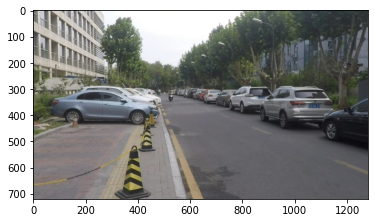

In [22]:
plt.imshow(f1)

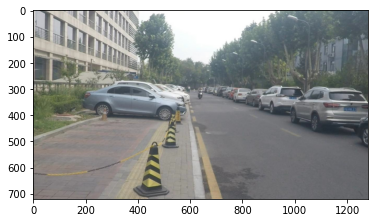

In [23]:
plt.imshow(f2)